Here we take a look at classifying the MNIST dataset.  We viewed a few samples from the dataset last time.  Our first stab will be using a multilayer perceptron (MLP) at classifying this data and assess the classifier's accuracy under a variety of scenarios.  

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
print mnist.target.shape,mnist.data.shape
X_train, X_test = X[:65000], X[65000:]
y_train, y_test = y[:65000], y[65000:]

(70000,) (70000, 784)


So we have our data partitioned into our appropriate train/test sets.  Now we need to pick a learning machine and train.  For this demonstration we will use the Multilayer Perceptron.  A multilayer perceptron is classified by an input layer, a number of hidden layers, and followed by an output layer.  A lot of learning machines learn nonlinear relationships in the data.  In a multilayer perceptron, the hidden units provide the non-linear relationship between the input and output.  

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

As with any learning machine there are a number of parameters to set that make each machine learning experiment different.  In this case we define a single hidden layer with 50 hidden units, use the stochastic gradient descent solver, and train for 10 iterations.  We will experiment with different topologies with the venerable MLP.

In [32]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.30982396
Iteration 2, loss = 0.14703519
Iteration 3, loss = 0.10935137
Iteration 4, loss = 0.09069437
Iteration 5, loss = 0.07716817
Iteration 6, loss = 0.06883613
Iteration 7, loss = 0.06181142
Iteration 8, loss = 0.05363490
Iteration 9, loss = 0.04949118
Iteration 10, loss = 0.04528709


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [33]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
y_hat=mlp.predict(X_train)
print 'Training accuracy using accuracy_score function',accuracy_score(y_train,y_hat)
y_hat=mlp.predict(X_test)
print 'Training accuracy using accuracy_score function',accuracy_score(y_test,y_hat)

Training set score: 0.987277
Test set score: 0.957600
Training accuracy using accuracy_score function 0.987276923076923
Training accuracy using accuracy_score function 0.9576


In [34]:
import numpy as np
k=y_test!=y_hat
print k

[ True False False ... False False False]


In [35]:
itemindex = np.where(k==True)

In [38]:
print itemindex[0]
print itemindex[0].shape

[   0  105  113  171  200  222  226  233  255  256  264  274  293  312
  316  327  342  352  377  391  400  413  419  431  432  462  463  497
  523  536  546  549  552  678  682  684  686  722  723  740  866  875
  977  982  988 1010 1014 1015 1028 1053 1066 1114 1118 1132 1184 1221
 1223 1267 1273 1352 1360 1364 1394 1422 1477 1645 1680 1956 1958 2057
 2062 2091 2115 2118 2123 2139 2143 2157 2168 2189 2194 2201 2290 2318
 2336 2383 2385 2387 2389 2397 2400 2419 2496 2561 2588 2903 2904 2905
 2906 3017 3029 3056 3066 3067 3075 3078 3102 3138 3151 3153 3160 3170
 3181 3189 3192 3196 3204 3209 3215 3240 3243 3247 3254 3267 3294 3301
 3302 3305 3307 3323 3330 3331 3354 3367 3372 3375 3378 3387 3397 3412
 3424 3444 3452 3459 3460 3465 3472 3484 3501 3503 3519 3539 3554 3555
 3580 3607 3637 3658 3659 3663 3666 3678 3723 3726 3753 3782 3831 3840
 3841 3850 3921 3931 3939 3961 3965 3967 3985 4009 4026 4040 4106 4107
 4121 4145 4158 4177 4210 4220 4221 4222 4247 4278 4325 4334 4355 4379
 4382 

In [39]:
print len(itemindex[0])

212


Based on the accuracy information we have an idea of the accuracy of our classifier and how many misclassifications there are.  To make further progress to improving the classifier we should probably take a look at the underlying misclassifications.  This is pretty easy (?)

In [40]:
random_index_match=1423
random_index_no_match=1422

(784,)


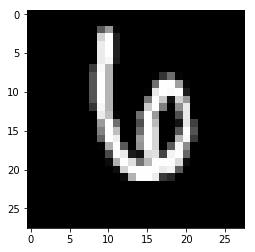

In [41]:
print X_test[random_index_match].shape
match_image=np.reshape(X_test[random_index_match],(28,28))
plt.imshow(match_image,cmap='gray')

In [42]:
print y_test[random_index_match]

6.0


(784,)


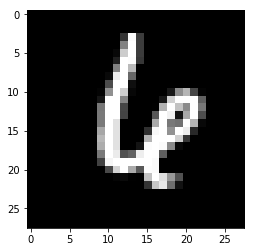

In [43]:
print X_test[random_index_no_match].shape
no_match_image=np.reshape(X_test[random_index_no_match],(28,28))
plt.imshow(no_match_image,cmap='gray')

In [44]:
print y_test[random_index_no_match],y_hat[random_index_no_match]

6.0 4.0


In [48]:
y=[0,1,2,3,7]
print y[:3],y[3:],y[:-1]

[0, 1, 2] [3, 7] [0, 1, 2, 3]
